In [41]:
#anomaly_data2.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('anomaly_data2.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [43]:
# plt.figure(2,2)


corr = df.corr()
corr


C:\Users\HP\AppData\Local\Temp\ipykernel_18600\4287818713.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,cpu_usage,memory_usage
cpu_usage,1.000000,-0.235547
memory_usage,-0.235547,1.000000


In [3]:
cpu_data = df[['cpu_usage', 'timestamp']]
memory_data = df[['memory_usage', 'timestamp']]

In [4]:
def moving_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

In [5]:
#identify deviation
def identify_deviation(data, window_size, sigma):
    avg = moving_average(data, window_size).tolist()
    residual = data - avg
    std = np.std(residual)
    return np.where(residual > std*sigma, 1, 0)

In [6]:
#detect anomaly
def detect_anomaly(data, window_size, sigma):
    deviation = identify_deviation(data, window_size, sigma)
    index = np.where(deviation == 1)
    return index[0].tolist()


     cpu_usage                 timestamp
313  36.512573 2023-12-06 00:05:00+00:00
314  29.040656 2023-12-06 00:10:00+00:00
315  28.004224 2023-12-06 00:15:00+00:00
316  27.517781 2023-12-06 00:20:00+00:00
317  30.263068 2023-12-06 00:25:00+00:00
..         ...                       ...
595  29.881999 2023-12-06 23:35:00+00:00
596  35.078664 2023-12-06 23:40:00+00:00
597  22.598842 2023-12-06 23:45:00+00:00
598  32.142302 2023-12-06 23:50:00+00:00
599  32.410657 2023-12-06 23:55:00+00:00

[287 rows x 2 columns]


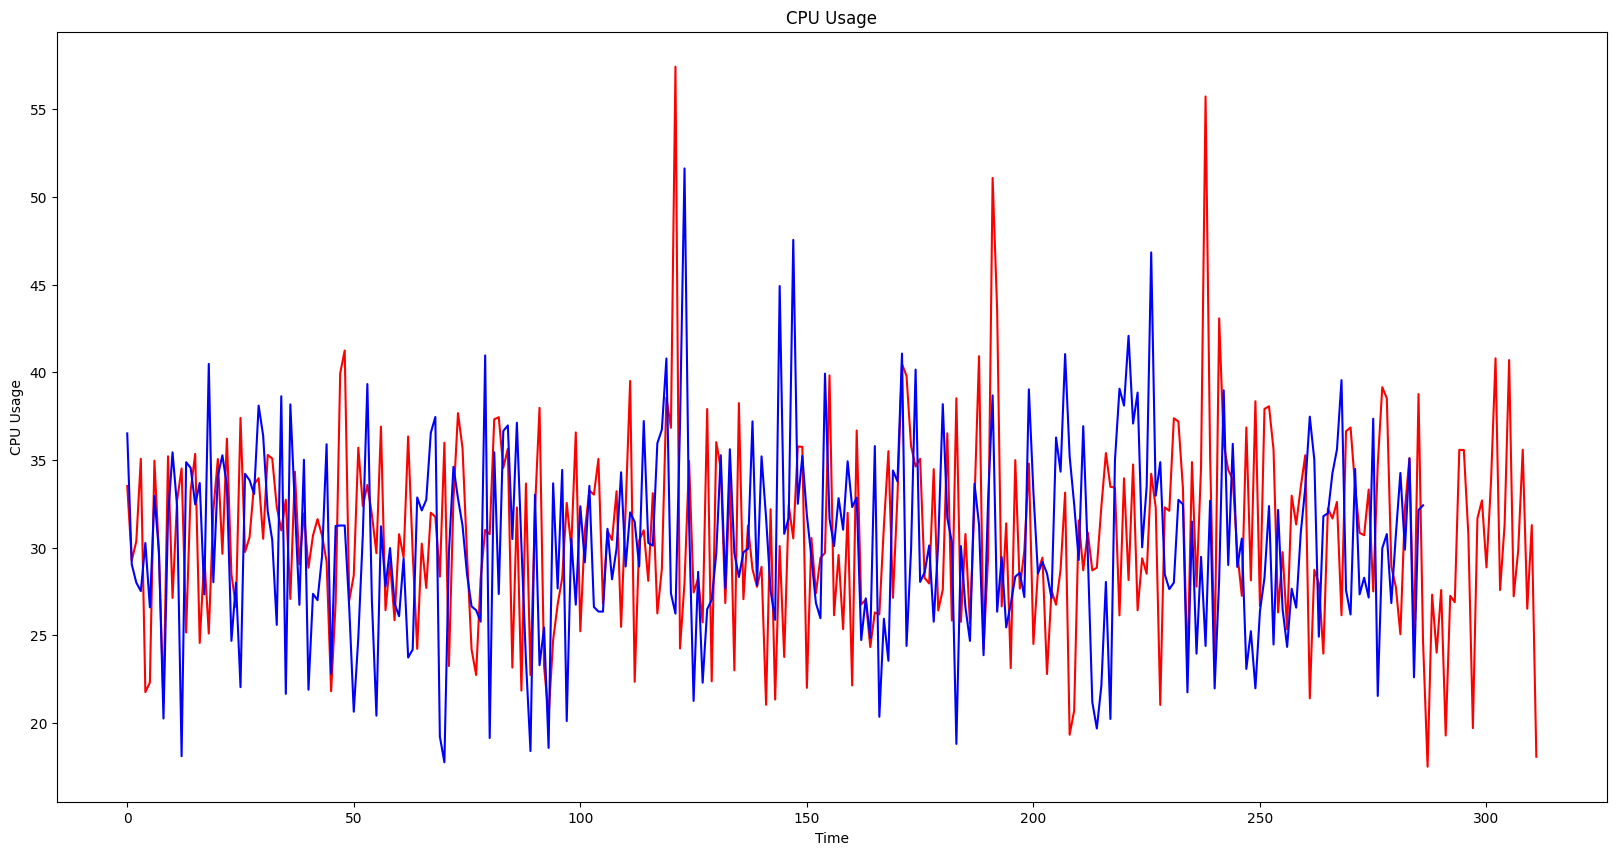

In [39]:
#plot data
# data1 = np.array(np.where((cpu_data['timestamp'] > "2023-12-05") & (cpu_data['timestamp'] < "2023-12-06")))
# print(data1)

data1 = cpu_data.where((cpu_data['timestamp'] < "2023-12-06")).dropna()
data2 = cpu_data.where((cpu_data['timestamp'] > "2023-12-06") & (cpu_data['timestamp'] < "2023-12-07")).dropna()
print(data2)

plt.figure(figsize=(20,10))
plt.plot(np.array(data1['cpu_usage']), color='red')
plt.plot(np.array(data2['cpu_usage']), color='blue')
# plt.plot(data2['timestamp'], data2['cpu_usage'], color='blue')
# plt.plot(cpu_data['timestamp])
# plt.plot(cpu_data['timestamp'], cpu_data['cpu_usage'], color='blue')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
# plt.xlim(pd.Timestamp('2023-12-05'), pd.Timestamp('2023-12-06'))
# plt.xlim(pd.Timestamp('2023-12-06'), pd.Timestamp('2023-12-07'))
plt.show()


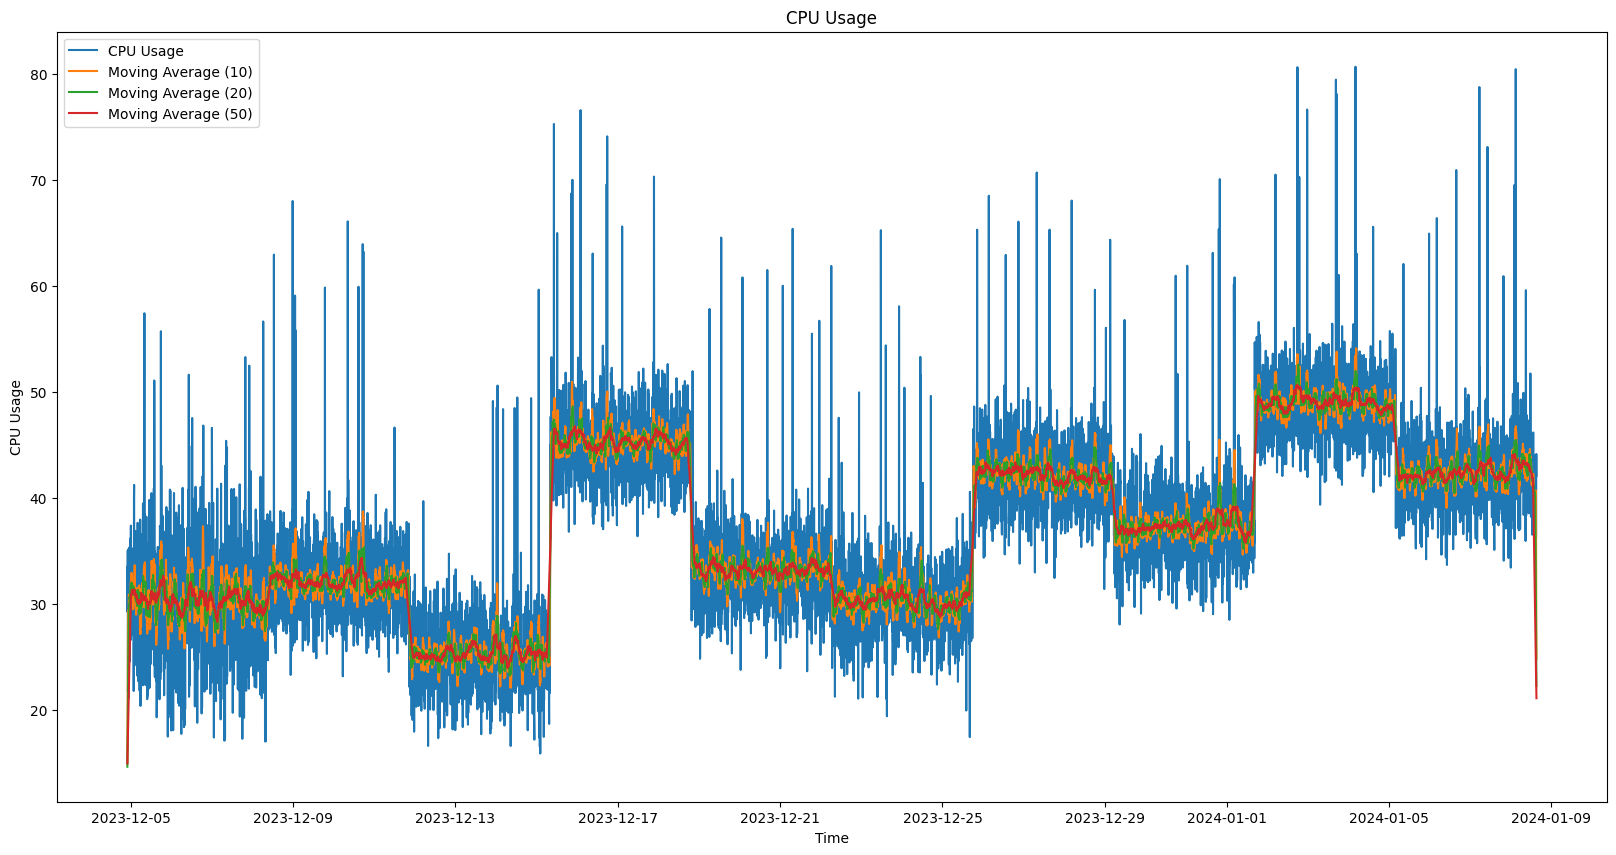

In [9]:
#plot moving average
plt.figure(figsize=(20,10))
plt.plot(cpu_data['timestamp'], cpu_data['cpu_usage'], label='CPU Usage')
plt.plot(cpu_data['timestamp'], moving_average(cpu_data['cpu_usage'], 10), label='Moving Average (10)')
plt.plot(cpu_data['timestamp'], moving_average(cpu_data['cpu_usage'], 20), label='Moving Average (20)')
plt.plot(cpu_data['timestamp'], moving_average(cpu_data['cpu_usage'], 50), label='Moving Average (50)')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()

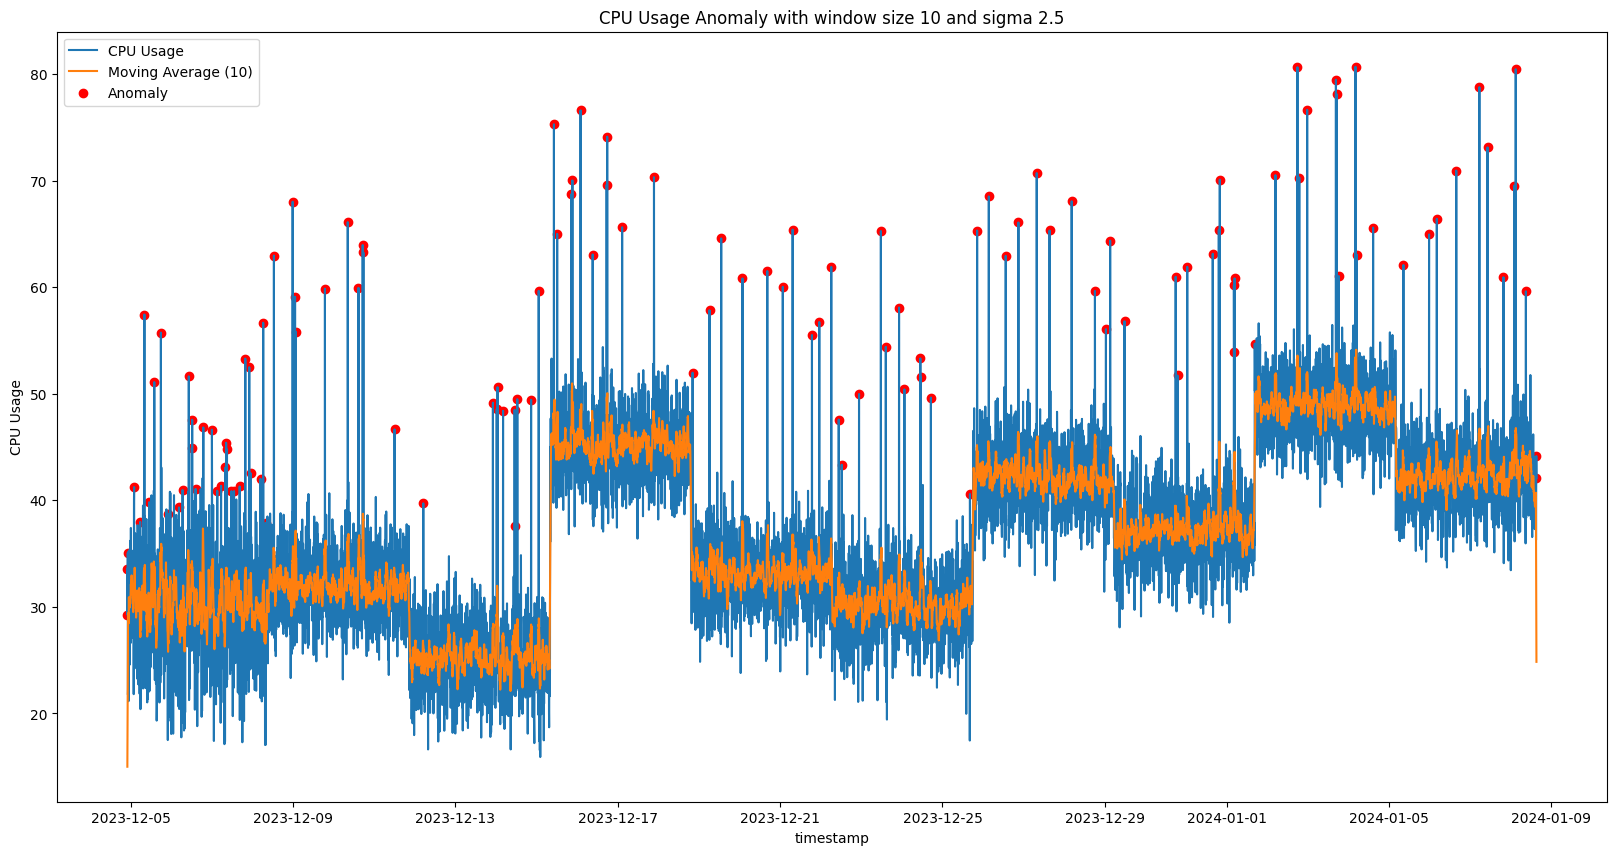

Total Anomaly : 126


In [10]:
#plot anomaly with window size 10 and sigma 2.5
plt.figure(figsize=(20,10))
plt.plot(cpu_data['timestamp'], cpu_data['cpu_usage'], label='CPU Usage')
plt.plot(cpu_data['timestamp'], moving_average(cpu_data['cpu_usage'], 10), label='Moving Average (10)')
plt.scatter(cpu_data['timestamp'][detect_anomaly(cpu_data['cpu_usage'], 10, 2.5)], cpu_data['cpu_usage'][detect_anomaly(cpu_data['cpu_usage'], 10, 2.5)], label='Anomaly', color='red')
plt.title('CPU Usage Anomaly with window size 10 and sigma 2.5')
plt.xlabel('timestamp')
plt.ylabel('CPU Usage')
# plt.xlim(pd.Timestamp('2023-12-16'), pd.Timestamp('2023-12-22'))
# plt.xlim(pd.Timestamp('2023-12-05'), pd.Timestamp('2023-12-08'))
# plt.xlim(pd.Timestamp('2024-01-08'), pd.Timestamp('2024-01-09'))
plt.legend()
plt.show()
print("Total Anomaly :", len(detect_anomaly(cpu_data['cpu_usage'], 10, 2.5)))


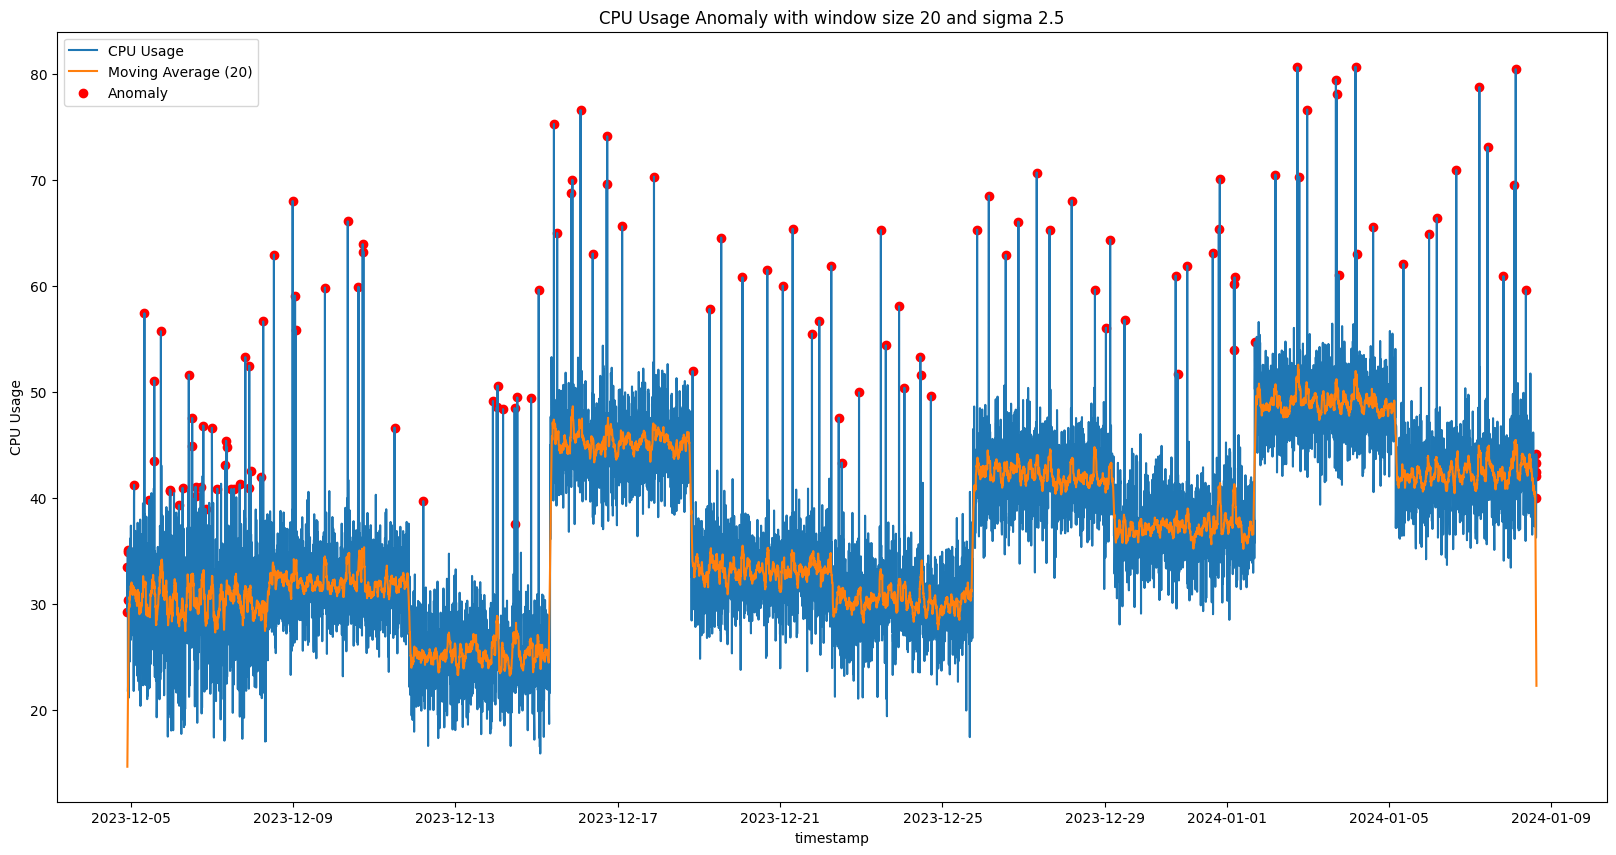

Total Anomaly : 133


In [88]:
#plot anomaly with window size 20 and sigma 2.5
plt.figure(figsize=(20,10))
plt.plot(cpu_data['timestamp'], cpu_data['cpu_usage'], label='CPU Usage')
plt.plot(cpu_data['timestamp'], moving_average(cpu_data['cpu_usage'], 20), label='Moving Average (20)')
plt.scatter(cpu_data['timestamp'][detect_anomaly(cpu_data['cpu_usage'], 20, 2.5)], cpu_data['cpu_usage'][detect_anomaly(cpu_data['cpu_usage'], 20, 2.5)], label='Anomaly', color='red')
plt.title('CPU Usage Anomaly with window size 20 and sigma 2.5')
plt.xlabel('timestamp')
plt.ylabel('CPU Usage')
# plt.xlim(pd.Timestamp('2023-12-05'), pd.Timestamp('2023-12-06'))
# plt.xlim(pd.Timestamp('2024-01-08'), pd.Timestamp('2024-01-09'))
plt.legend()
plt.show()
print("Total Anomaly :", len(detect_anomaly(cpu_data['cpu_usage'], 20, 2.5)))


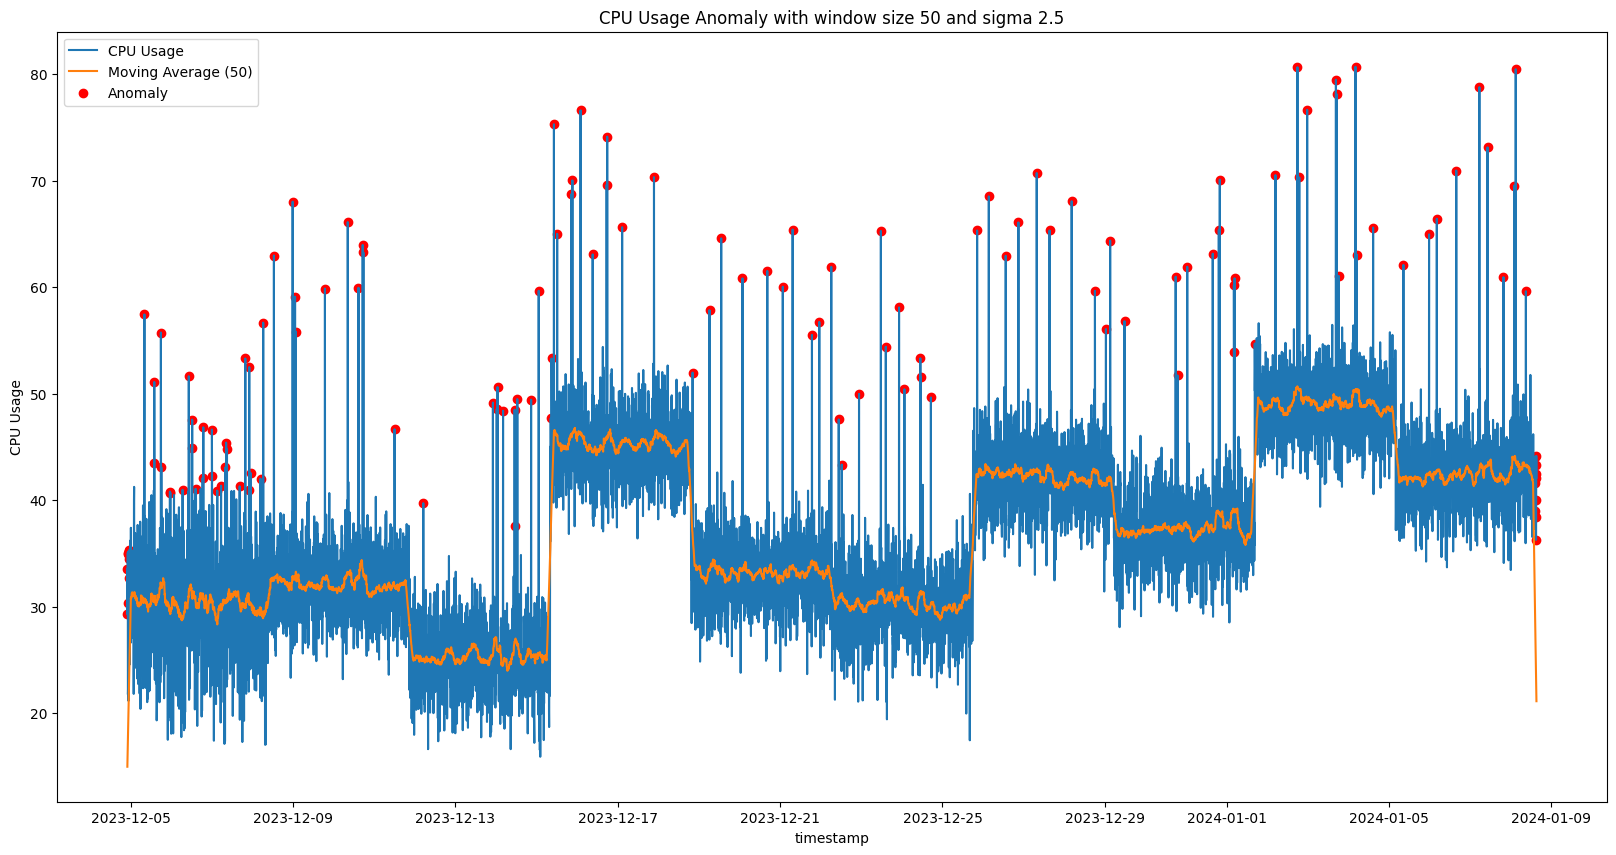

Total Anomaly : 140


In [89]:
#plot anomaly with window size 50 and sigma 2.5
plt.figure(figsize=(20,10))
plt.plot(cpu_data['timestamp'], cpu_data['cpu_usage'], label='CPU Usage')
plt.plot(cpu_data['timestamp'], moving_average(cpu_data['cpu_usage'], 50), label='Moving Average (50)')
plt.scatter(cpu_data['timestamp'][detect_anomaly(cpu_data['cpu_usage'], 50, 2.5)], cpu_data['cpu_usage'][detect_anomaly(cpu_data['cpu_usage'], 50, 2.5)], label='Anomaly', color='red')
plt.title('CPU Usage Anomaly with window size 50 and sigma 2.5')
plt.xlabel('timestamp')
plt.ylabel('CPU Usage')
# plt.xlim(pd.Timestamp('2023-06-50'), pd.Timestamp('2023-07-01'))
# plt.xlim(pd.Timestamp('2023-07-02'), pd.Timestamp('2023-07-08'))
plt.legend()
plt.show()
print("Total Anomaly :", len(detect_anomaly(cpu_data['cpu_usage'], 50, 2.5)))


In [90]:
anomaly = detect_anomaly(cpu_data['cpu_usage'], 10, 2.5)
anomaly = np.array(anomaly)
len(anomaly)

126

In [91]:
cpu_data['anomaly'] = 0
cpu_data['anomaly'][anomaly] = 1
cpu_data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_16280\4246543511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu_data['anomaly'][anomaly] = 1


,cpu_usage,timestamp,anomaly
0,33.512495,2023-12-04 22:00:00+00:00,1
1,29.268888,2023-12-04 22:05:00+00:00,1
2,30.358837,2023-12-04 22:10:00+00:00,0
3,35.063998,2023-12-04 22:15:00+00:00,1
4,21.756007,2023-12-04 22:20:00+00:00,0


In [92]:
#cut the first 4 row
cpu_data = cpu_data[4:]

In [93]:
cpu_data

,cpu_usage,timestamp,anomaly
4,21.756007,2023-12-04 22:20:00+00:00,0
5,22.302332,2023-12-04 22:25:00+00:00,0
6,34.959884,2023-12-04 22:30:00+00:00,0
7,29.625328,2023-12-04 22:35:00+00:00,0
8,21.144231,2023-12-04 22:40:00+00:00,0
...,...,...,...
9995,43.327759,2024-01-08 14:55:00+00:00,0
9996,36.268165,2024-01-08 15:00:00+00:00,0
9997,40.028437,2024-01-08 15:05:00+00:00,0
9998,44.154303,2024-01-08 15:10:00+00:00,1


In [94]:
# cpu_data.to_csv('cpu_anomaly_data2.csv', index=False)

#Memory Data

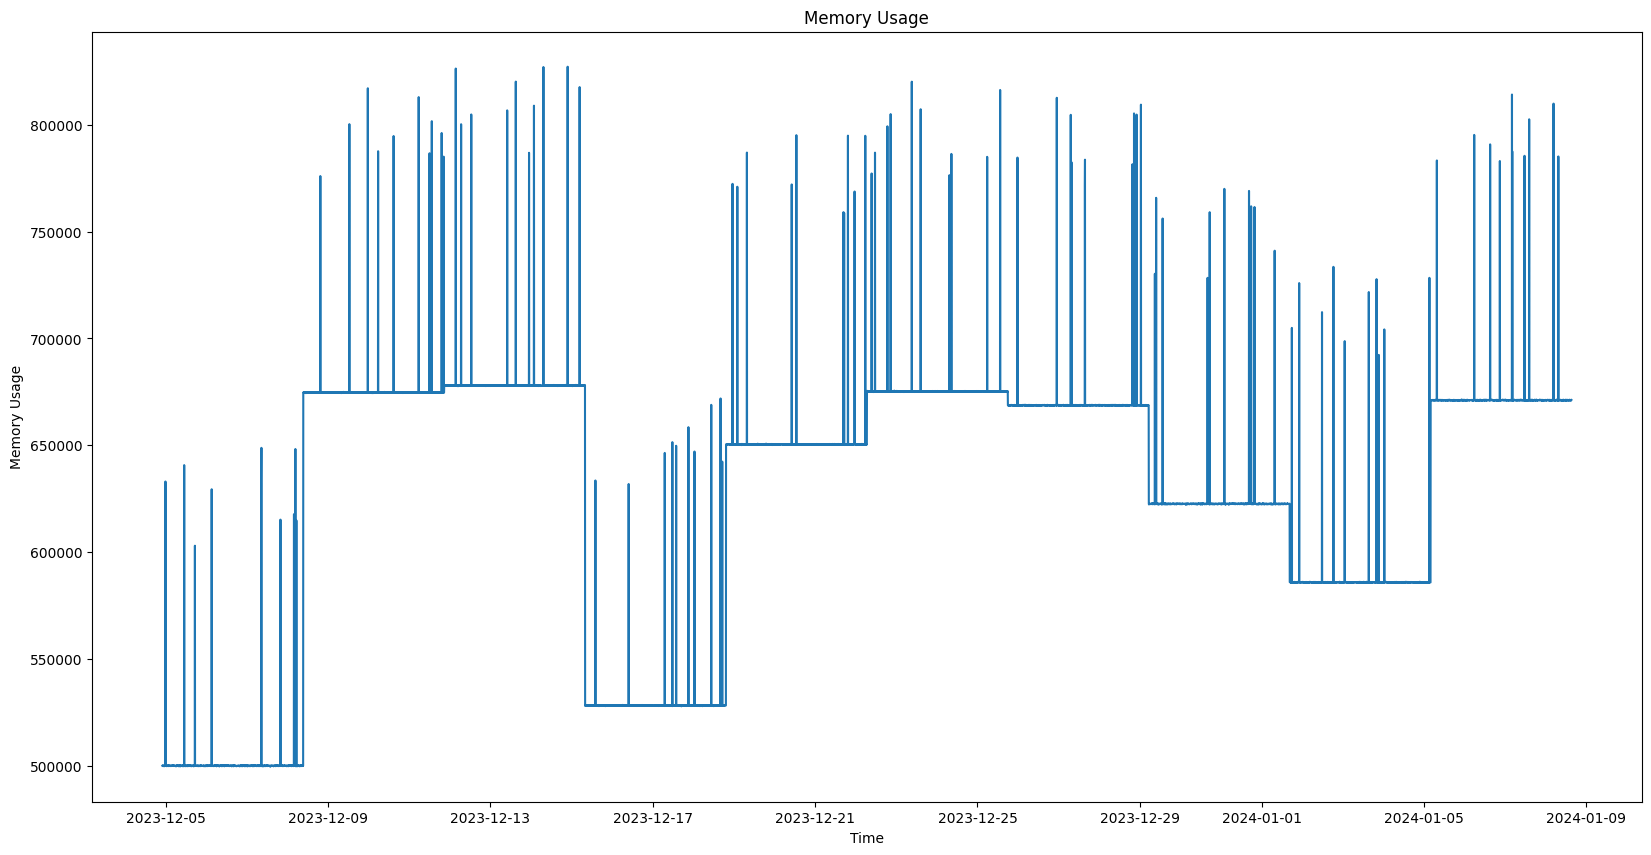

In [96]:
#plot data
plt.figure(figsize=(20,10))
plt.plot(memory_data['timestamp'], memory_data['memory_usage'])
plt.title('Memory Usage')
plt.xlabel('Time')
plt.ylabel('Memory Usage')
plt.show()


In [98]:
#Preprocess data
memory_data['memory_usage'] = (memory_data['memory_usage']/1000000) * 100
memory_data


C:\Users\HP\AppData\Local\Temp\ipykernel_16280\3274597544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  memory_data['memory_usage'] = (memory_data['memory_usage']/1000000) * 100


,memory_usage,timestamp
0,50.002994,2023-12-04 22:00:00+00:00
1,49.997625,2023-12-04 22:05:00+00:00
2,50.008039,2023-12-04 22:10:00+00:00
3,50.000407,2023-12-04 22:15:00+00:00
4,49.987686,2023-12-04 22:20:00+00:00
...,...,...
9995,67.120851,2024-01-08 14:55:00+00:00
9996,67.092148,2024-01-08 15:00:00+00:00
9997,67.100597,2024-01-08 15:05:00+00:00
9998,67.108008,2024-01-08 15:10:00+00:00


In [ ]:
#plot data
plt.figure(figsize=(20,10))
plt.plot(memory_data['timestamp'], memory_data['memory_usage'])
plt.title('Memory Usage')
plt.xlabel('Time')
plt.ylabel('Memory Usage')
plt.show()


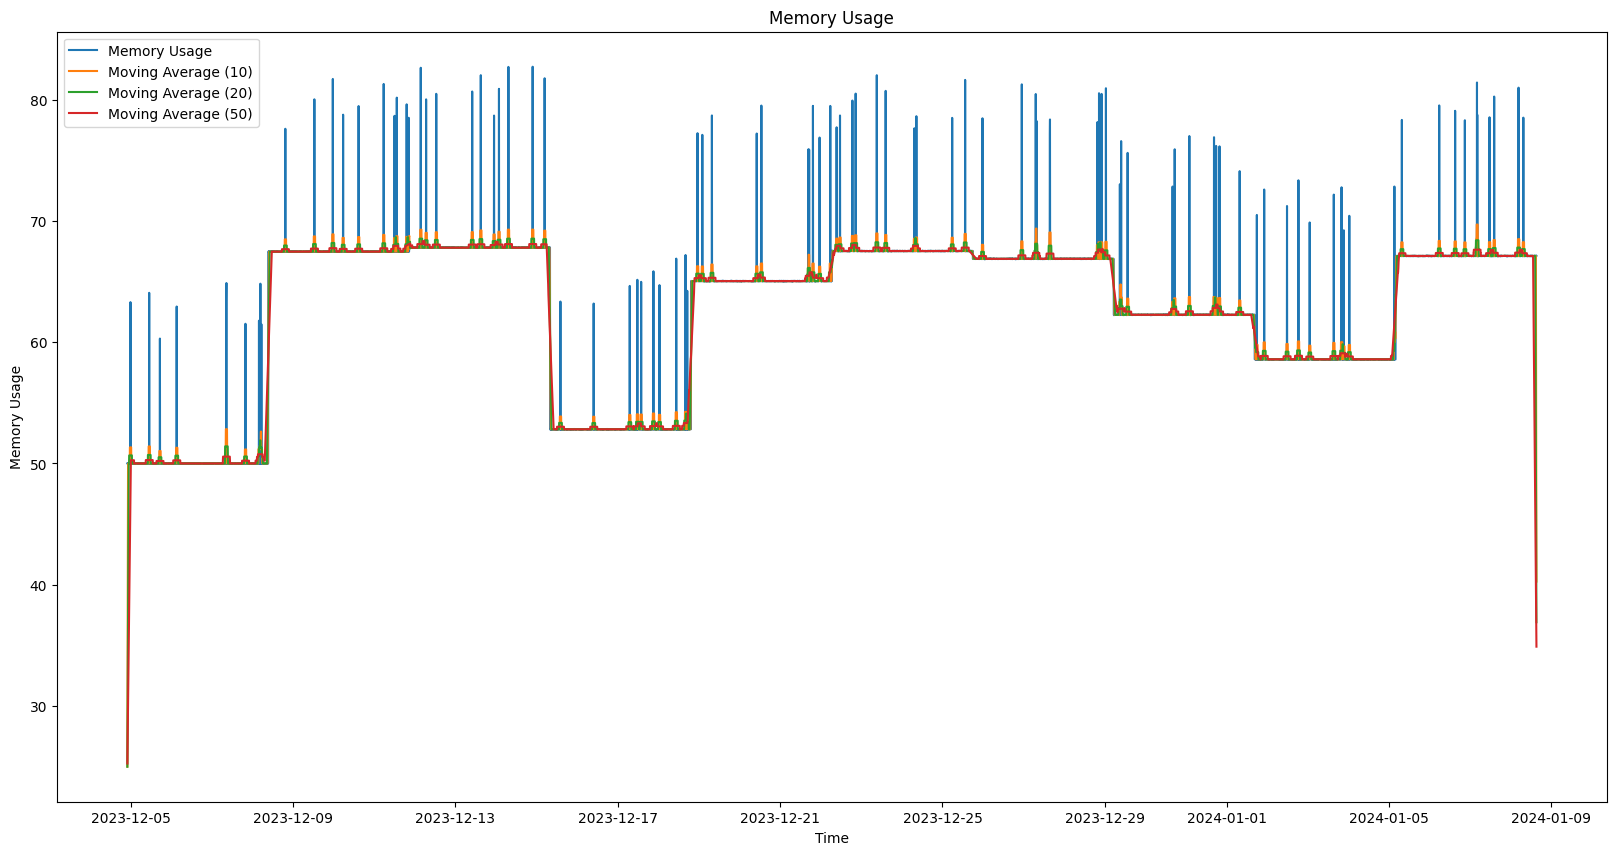

In [99]:
#plot moving average
plt.figure(figsize=(20,10))
plt.plot(memory_data['timestamp'], memory_data['memory_usage'], label='Memory Usage')
plt.plot(memory_data['timestamp'], moving_average(memory_data['memory_usage'], 10), label='Moving Average (10)')
plt.plot(memory_data['timestamp'], moving_average(memory_data['memory_usage'], 20), label='Moving Average (20)')
plt.plot(memory_data['timestamp'], moving_average(memory_data['memory_usage'], 50), label='Moving Average (50)')
plt.title('Memory Usage')
plt.xlabel('Time')
plt.ylabel('Memory Usage')
plt.legend()
plt.show()

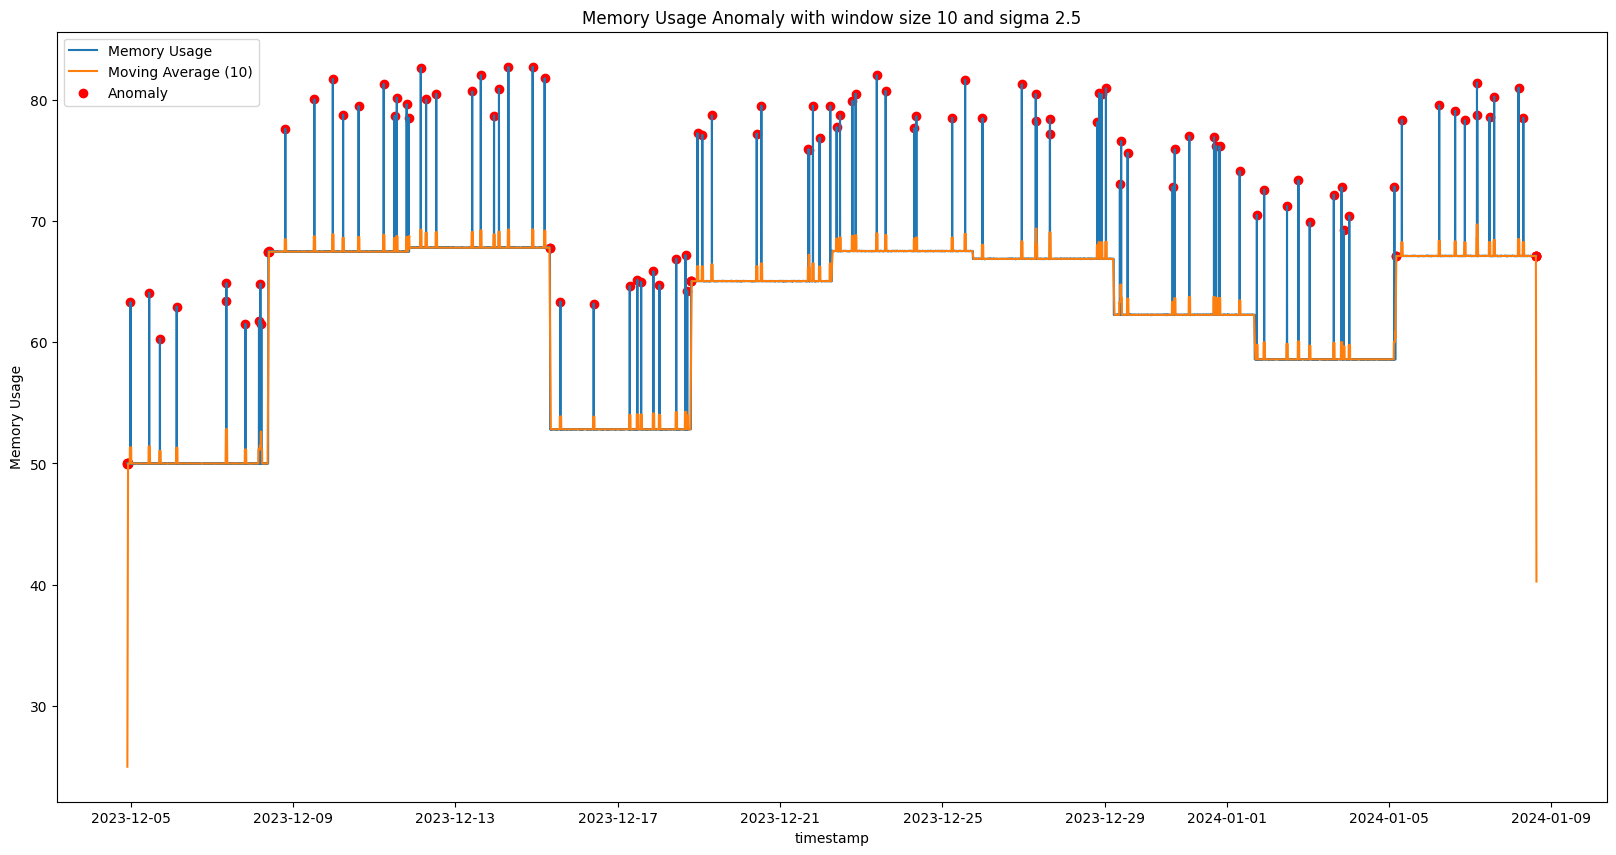

Total Anomaly : 120


In [105]:
#plot anomaly with window size 10 and sigma 2.5
plt.figure(figsize=(20,10))
plt.plot(memory_data['timestamp'], memory_data['memory_usage'], label='Memory Usage')
plt.plot(memory_data['timestamp'], moving_average(memory_data['memory_usage'], 10), label='Moving Average (10)')
plt.scatter(memory_data['timestamp'][detect_anomaly(memory_data['memory_usage'], 10, 2.5)], memory_data['memory_usage'][detect_anomaly(memory_data['memory_usage'], 10, 2.5)], label='Anomaly', color='red')
plt.title('Memory Usage Anomaly with window size 10 and sigma 2.5')
plt.xlabel('timestamp')
plt.ylabel('Memory Usage')
# plt.xlim(pd.Timestamp('2023-12-13'), pd.Timestamp('2023-12-25'))
# plt.xlim(pd.Timestamp('2023-12-04'), pd.Timestamp('2023-12-06'))
# plt.xlim(pd.Timestamp('2024-01-08'), pd.Timestamp('2024-01-09'))
plt.legend()
plt.show()
print("Total Anomaly :", len(detect_anomaly(memory_data['memory_usage'], 10, 2.5)))


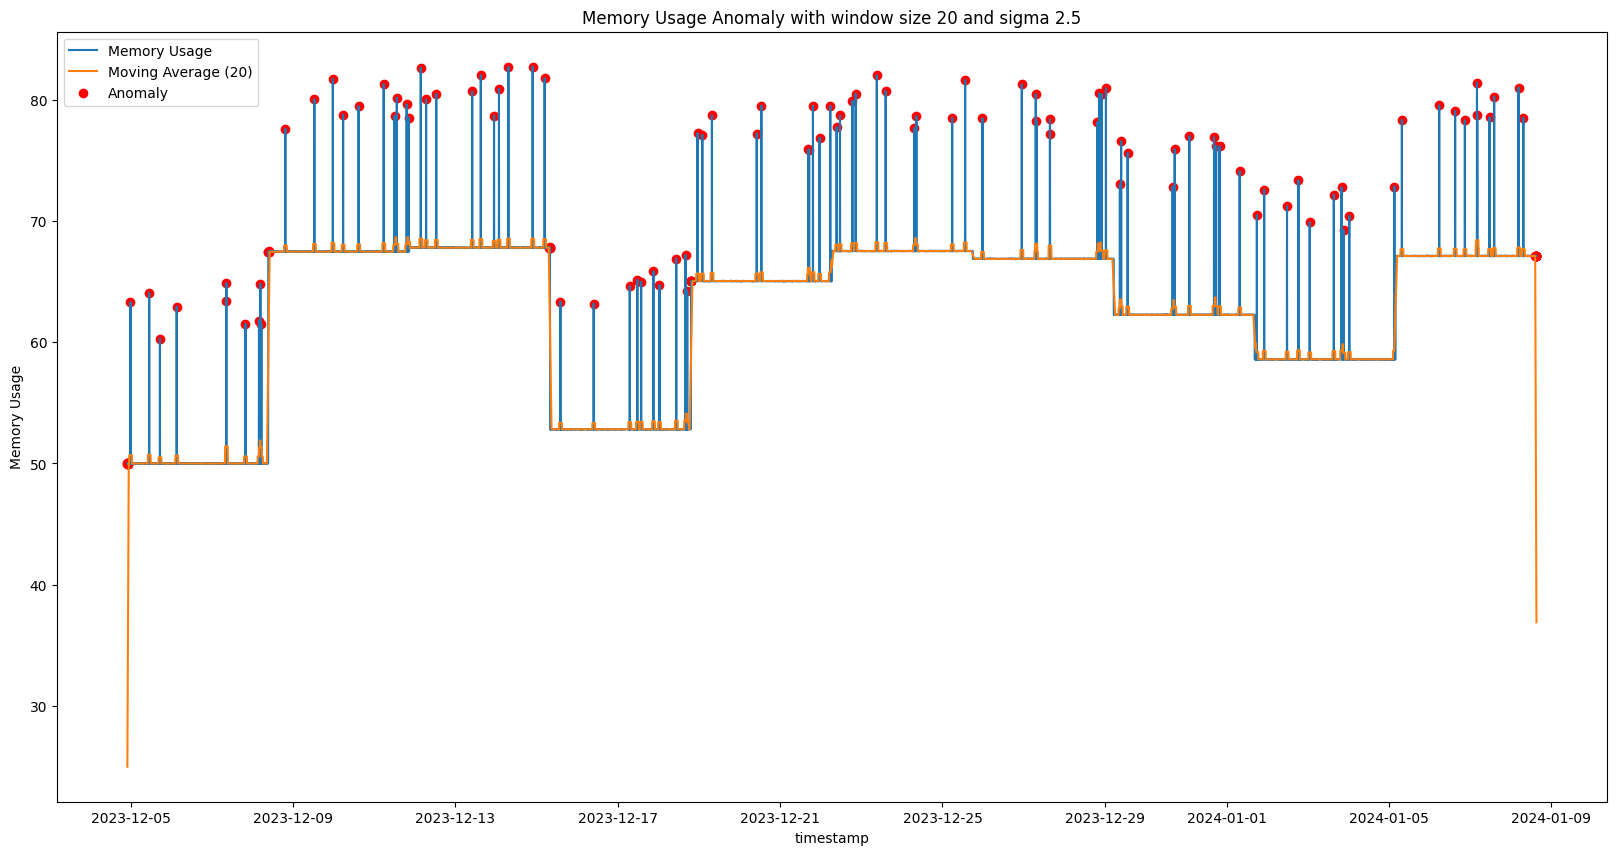

Total Anomaly : 132


In [101]:
#plot anomaly with window size 20 and sigma 2.5
plt.figure(figsize=(20,10))
plt.plot(memory_data['timestamp'], memory_data['memory_usage'], label='Memory Usage')
plt.plot(memory_data['timestamp'], moving_average(memory_data['memory_usage'], 20), label='Moving Average (20)')
plt.scatter(memory_data['timestamp'][detect_anomaly(memory_data['memory_usage'], 20, 2.5)], memory_data['memory_usage'][detect_anomaly(memory_data['memory_usage'], 20, 2.5)], label='Anomaly', color='red')
plt.title('Memory Usage Anomaly with window size 20 and sigma 2.5')
plt.xlabel('timestamp')
plt.ylabel('Memory Usage')
# plt.xlim(pd.Timestamp('2023-12-13'), pd.Timestamp('2023-12-20'))
# plt.xlim(pd.Timestamp('2023-12-04'), pd.Timestamp('2023-12-06'))
# plt.xlim(pd.Timestamp('2024-01-08'), pd.Timestamp('2024-01-09'))
plt.legend()
plt.show()
print("Total Anomaly :", len(detect_anomaly(memory_data['memory_usage'], 20, 2.5)))


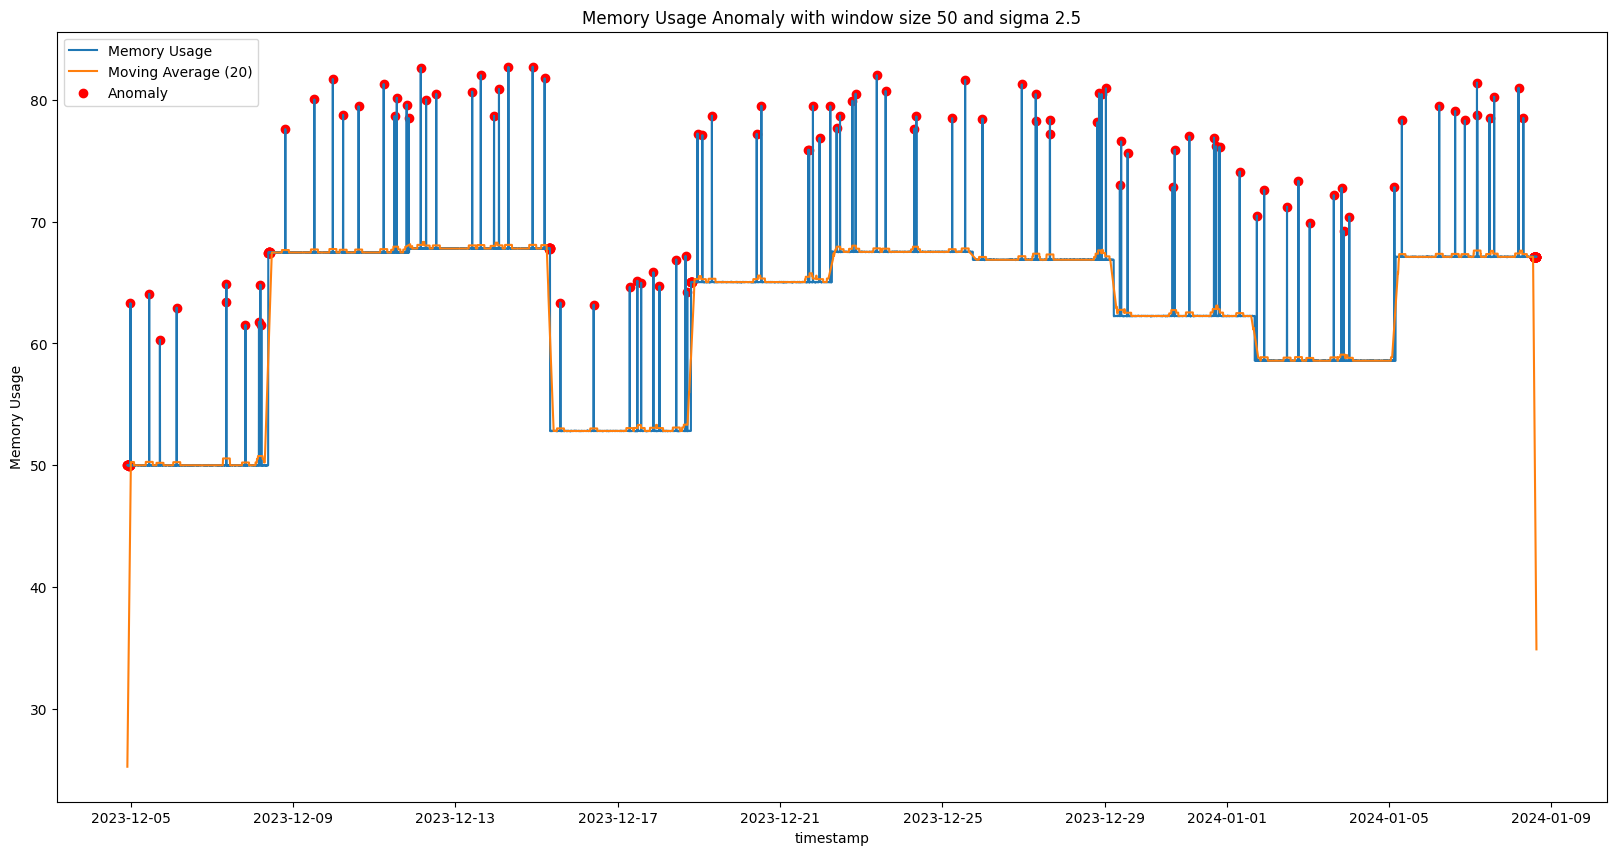

Total Anomaly : 170


In [102]:
#plot anomaly with window size 20 and sigma 2.5
plt.figure(figsize=(20,10))
plt.plot(memory_data['timestamp'], memory_data['memory_usage'], label='Memory Usage')
plt.plot(memory_data['timestamp'], moving_average(memory_data['memory_usage'], 50), label='Moving Average (20)')
plt.scatter(memory_data['timestamp'][detect_anomaly(memory_data['memory_usage'], 50, 2.5)], memory_data['memory_usage'][detect_anomaly(memory_data['memory_usage'], 50, 2.5)], label='Anomaly', color='red')
plt.title('Memory Usage Anomaly with window size 50 and sigma 2.5')
plt.xlabel('timestamp')
plt.ylabel('Memory Usage')
# plt.xlim(pd.Timestamp('2023-12-13'), pd.Timestamp('2023-12-20'))
# plt.xlim(pd.Timestamp('2023-12-04'), pd.Timestamp('2023-12-06'))
# plt.xlim(pd.Timestamp('2024-01-08'), pd.Timestamp('2024-01-09'))
plt.legend()
plt.show()
print("Total Anomaly :", len(detect_anomaly(memory_data['memory_usage'], 50, 2.5)))


In [106]:
#Terdeteksi bahwa window size 10 dan sigma 2.5 menampilkan anomaly yang masuk logika
anomaly = detect_anomaly(memory_data['memory_usage'], 10, 2.5)
anomaly = np.array(anomaly)
len(anomaly)

120

In [111]:
memory_data['anomaly'] = 0
memory_data['anomaly'][anomaly] = 1

C:\Users\HP\AppData\Local\Temp\ipykernel_16280\3182239257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  memory_data['anomaly'][anomaly] = 1


In [112]:
#cut the first 5 row
memory_data = memory_data[5:]
memory_data

,memory_usage,timestamp,anomaly
5,50.002197,2023-12-04 22:25:00+00:00,0
6,49.994604,2023-12-04 22:30:00+00:00,0
7,49.991114,2023-12-04 22:35:00+00:00,0
8,49.995935,2023-12-04 22:40:00+00:00,0
9,49.984534,2023-12-04 22:45:00+00:00,0
...,...,...,...
9995,67.120851,2024-01-08 14:55:00+00:00,0
9996,67.092148,2024-01-08 15:00:00+00:00,1
9997,67.100597,2024-01-08 15:05:00+00:00,1
9998,67.108008,2024-01-08 15:10:00+00:00,1


In [113]:
# memory_data.to_csv('memory_anomaly_data2.csv', index=False)